_____
# **LINEAR REGRESSION**
________

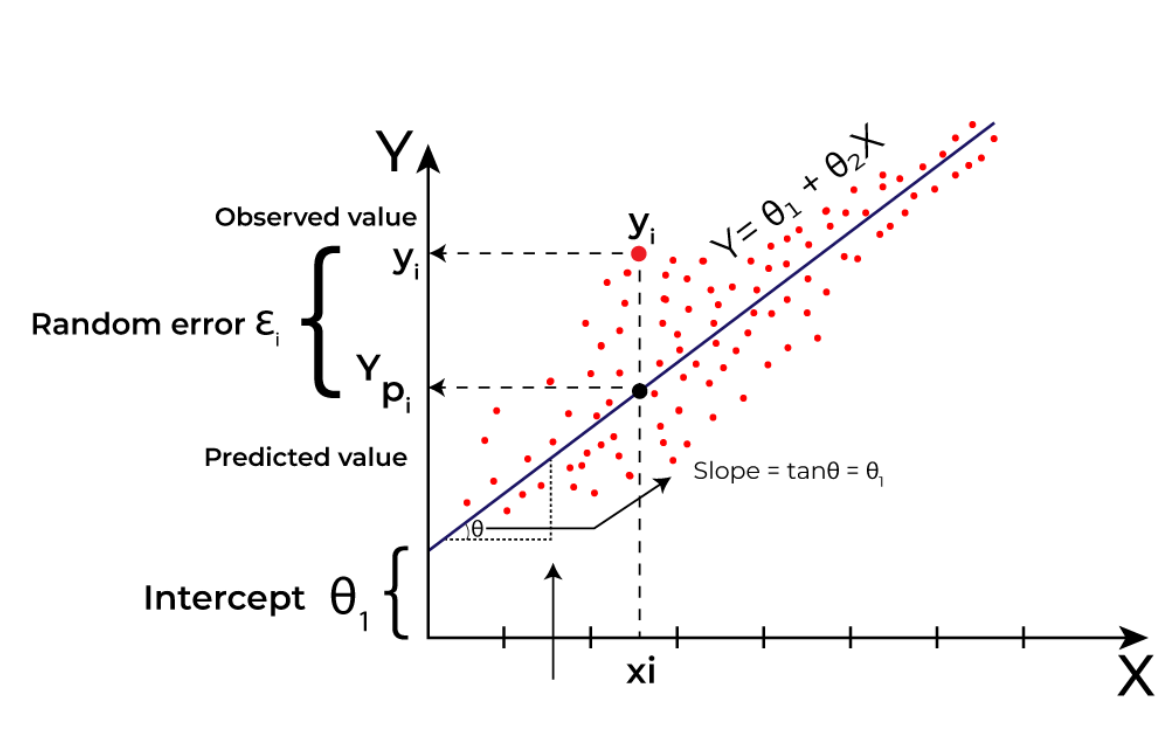

Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features (independent variables).The Student Performance Data Set from the UCI Machine Learning Repository is a well-known dataset that we will employ.  This dataset can be used to predict students' final grades because it includes factors like study time, failures, absences, and more.

The dependent variable, y, and the independent variable or variables, x, are assumed to have a linear relationship.

The simple linear regression formula is:

𝑦=
𝑚
𝑥
+
𝑏
y=mx+b

Where:

- 𝑦
 is the predicted value (target)

- 𝑥
 is the input feature  

- m is the slope (how much y changes with x)

- 𝑏
 is the intercept (the value of y when x = 0)

For multiple linear regression with more than one input feature:

y=b+w 
1
​
 x 
1
​
 +w 
2
​
 x 
2
​
 +...+w 
n
​
 x 
n
​

Where:

- 𝑤
1
,
𝑤
2
,
.
.
.
,
𝑤
𝑛
w 
1
​
 ,w 
2
​
 ,...,w 
n
​
  are the weights (coefficients)

-  𝑥
1
,
𝑥
2
,
.
.
.
,
𝑥
𝑛
x 
1
​
 ,x 
2
​
 ,...,x 
n
​
  are the features

- 𝑏
 is the intercept   



## **Task For this Notebook**

The Student Performance Data Set from the UCI Machine Learning Repository is a well-known dataset that we will employ.  This dataset can be used to predict students' final grades because it includes factors like study time, failures, absences, and more.

### Required libraries

The libraries required to achieve the task of this note book are:

- **pandas** → Load and handle data (e.g., CSV files).

- **matplotlib.pyplot** → Create plots and visualizations.

- **seaborn** → Prettier plots (built on matplotlib).

- **sklearn.linear_model** → Build and train the Linear Regression model.

- **sklearn.model_selection** → Split data into training and test sets.

- **sklearn.metrics** → Check how well the model performs (e.g., MSE, R²).

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Load Data



In [32]:
# Data is semi-colon seperated

df = pd.read_csv('student-mat.csv', sep=';')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data Types and Columns (Data Exploration)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Data Cleaning

In [34]:
# Number of missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [35]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


### Listing the columns of the data set

The columns in this data set are as follows;

In [36]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Feature Selection

In this case the final grade (G3) will be predicted by the model using the other feature like studytime, failures and absences

In [37]:
X = df[['studytime', 'failures', 'absences']]
y = df['G3']

### Data Spliting

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Initialization and Training

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Predictions

This is done by the Computing 
𝑦
^
(predicted output) using the formula above.

In [40]:
y_pred = model.predict(X_test)

### Model Evaluation

The model is evaluated by Loss Calculation. Which is to use Mean Squared Error (MSE) to measure how far off the predictions are.

[mse diagaram]

In [41]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 19.874690744643704
R2 Score: 0.030741529886839758


In this case, on average, the predictions are about √19.87 ≈ 4.46 units off from the real G3 grades. And we should remember that when it comes to MSE, it measueres the **average squared difference between the actual and predicted values**.

The score of **0.03** means the model is only explaining **3%** of the variation in final grades — which is quite low. This means the model is peforming well

### Plot of the Preditcion vs Actual Final Grades

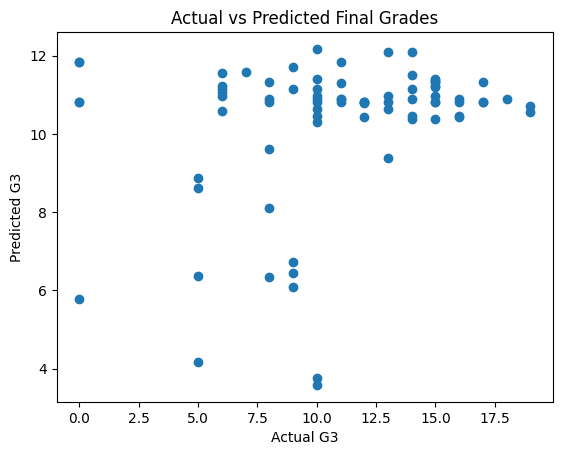

In [42]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted Final Grades')
plt.show()

**Key Observations from Graph**

- Most predicted grades cluster around 10-12, regardless of the actual grades. This suggests that the prediction model does not fully capture the variability in actual grades.

- Actual grades range from 0 to about 17.5, but predicted grades are narrowly concentrated, meaning the model tends to make conservative predictions that do not fully reflect the higher and lower actual grades.

- The ideal trend would be a diagonal line from bottom-left to top-right, meaning predicted grades match actual grades perfectly—but in this case, there is noticeable deviation.


**What this Means**

- The model may be biased toward average grades, failing to predict extreme values (both very low and very high grades).

## **Conclusion of Notebook**

In this notebook, we used a real-world dataset on student performance to investigate linear regression. Based on a few chosen characteristics, including study time, the number of prior failures, and absences, we trained a model to forecast students' final grades (G3).

The model's performance was restricted, despite its ability to generate predictions:

- Significant differences between actual and expected grades were indicated by the comparatively large Mean Squared Error (MSE).

- The model only partially explains the variance in student performance, as indicated by the low R2 Score.

The graph makes it clear that:

- Even though actual grades are significantly lower or higher, predictions are closely clustered around the intermediate grade range (10–12).

- The model's inability to fully capture the variety of outcomes is probably caused by either an oversimplified linear assumption or a lack of characteristics.


